In [ ]:
# cnn adam --- LR-0.001
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            print(f"Checking folder: {folder_path}")  # Debugging print
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    print(f"Processing subfolder: {subfolder_path}")  # Debugging print
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"Processing file: {img_path}")  # Debugging print
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
                            else:
                                print(f"Warning: Could not load image {img_path}")
                        else:
                            print(f"Skipping non-image file: {img_path}")
                else:
                    print(f"Skipping non-directory file: {subfolder_path}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Check if data is loaded correctly
print(f"Shape of images array: {images.shape}")
print(f"Length of labels array: {len(labels)}")

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
# Healthy: 0, Unhealthy (Early Blight, Late Blight): 1
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy
print(f"Shape of labels_healthy_unhealthy: {labels_healthy_unhealthy.shape}")

# Label encoding for Early Blight vs. Late Blight classification
# Early Blight: 0, Late Blight: 1
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight
print(f"Shape of labels_early_late: {labels_early_late.shape}")

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shapes before proceeding
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Compile and train Healthy vs. Unhealthy classification model
model_healthy_unhealthy.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Check shapes before proceeding
print(f"Shape of X_train_early_late: {X_train_early_late.shape}, Shape of X_test_early_late: {X_test_early_late.shape}")
print(f"Shape of y_train_early_late: {y_train_early_late.shape}, Shape of y_test_early_late: {y_test_early_late.shape}")

# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Compile and train Early Blight vs. Late Blight classification model
model_early_late.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Checking folder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid
Processing subfolder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_3856.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_9254.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_1070.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-53-_0_2222.jpg
Processing file: /content/dr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7121 - loss: 0.5338 - val_accuracy: 0.9467 - val_loss: 0.1671
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9480 - loss: 0.1461 - val_accuracy: 0.8467 - val_loss: 0.2981
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9479 - loss: 0.1292 - val_accuracy: 0.9633 - val_loss: 0.1041
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9736 - loss: 0.0800 - val_accuracy: 0.9167 - val_loss: 0.3754
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.9242 - loss: 0.2550 - val_accuracy: 0.9600 - val_loss: 0.1110
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9511 - loss: 0.1038 - val_accuracy: 0.9633 - val_loss: 0.0954
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9693 - loss: 0.0811 - val_accuracy: 0.9767 - val_loss: 0.0628
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9862 - loss: 0.0341 - val_accuracy: 0.9700 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6487 - loss: 0.6745 - val_accuracy: 0.9633 - val_loss: 0.1390
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9323 - loss: 0.1714 - val_accuracy: 0.9633 - val_loss: 0.1014
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9680 - loss: 0.0941 - val_accuracy: 0.9500 - val_loss: 0.1169
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9544 - loss: 0.1237 - val_accuracy: 0.9733 - val_loss: 0.0784
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9820 - loss: 0.0805 - val_accuracy: 0.9500 - val_loss: 0.1609
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9663 - loss: 0.0837 - val_accuracy: 0.9467 - val_loss: 0.1092
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9763 - loss: 0.0827 - val_accuracy: 0.9600 - val_loss: 0.1023
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9823 - loss: 0.0609 - val_accuracy: 0.9700 - val_loss:

In [ ]:
#RMS prop
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            print(f"Checking folder: {folder_path}")  # Debugging print
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    print(f"Processing subfolder: {subfolder_path}")  # Debugging print
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"Processing file: {img_path}")  # Debugging print
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
                            else:
                                print(f"Warning: Could not load image {img_path}")
                        else:
                            print(f"Skipping non-image file: {img_path}")
                else:
                    print(f"Skipping non-directory file: {subfolder_path}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Check if data is loaded correctly
print(f"Shape of images array: {images.shape}")
print(f"Length of labels array: {len(labels)}")

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
# Healthy: 0, Unhealthy (Early Blight, Late Blight): 1
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy
print(f"Shape of labels_healthy_unhealthy: {labels_healthy_unhealthy.shape}")

# Label encoding for Early Blight vs. Late Blight classification
# Early Blight: 0, Late Blight: 1
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight
print(f"Shape of labels_early_late: {labels_early_late.shape}")

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shapes before proceeding
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create a new optimizer instance for the Healthy vs. Unhealthy model
optimizer_healthy_unhealthy = RMSprop(learning_rate=0.0001)

# Compile and train the Healthy vs. Unhealthy model
model_healthy_unhealthy.compile(optimizer=optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Check shapes before proceeding
print(f"Shape of X_train_early_late: {X_train_early_late.shape}, Shape of X_test_early_late: {X_test_early_late.shape}")
print(f"Shape of y_train_early_late: {y_train_early_late.shape}, Shape of y_test_early_late: {y_test_early_late.shape}")

# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create a new optimizer instance for the Early Blight vs. Late Blight model
optimizer_early_late = RMSprop(learning_rate=0.0001)

# Compile and train the Early Blight vs. Late Blight model
model_early_late.compile(optimizer=optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Checking folder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid
Processing subfolder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_3856.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_9254.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_1070.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-53-_0_2222.jpg
Processing file: /content/dr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6470 - loss: 0.6409 - val_accuracy: 0.6533 - val_loss: 0.6090
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6820 - loss: 0.5597 - val_accuracy: 0.8767 - val_loss: 0.4742
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8406 - loss: 0.4006 - val_accuracy: 0.8167 - val_loss: 0.3556
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8847 - loss: 0.2897 - val_accuracy: 0.8967 - val_loss: 0.2424
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9188 - loss: 0.2174 - val_accuracy: 0.9067 - val_loss: 0.2181
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9480 - loss: 0.1532 - val_accuracy: 0.9300 - val_loss: 0.1616
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9467 - loss: 0.1410 - val_accuracy: 0.9400 - val_loss: 0.1361
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9596 - loss: 0.1063 - val_accuracy: 0.9600 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6478 - loss: 0.6757 - val_accuracy: 0.7167 - val_loss: 0.5764
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7064 - loss: 0.5878 - val_accuracy: 0.7200 - val_loss: 0.4952
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8016 - loss: 0.4575 - val_accuracy: 0.8867 - val_loss: 0.3218
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8696 - loss: 0.3349 - val_accuracy: 0.9400 - val_loss: 0.2539
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9052 - loss: 0.2680 - val_accuracy: 0.6900 - val_loss: 0.5404
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9173 - loss: 0.2237 - val_accuracy: 0.9200 - val_loss: 0.1967
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9437 - loss: 0.1606 - val_accuracy: 0.9433 - val_loss: 0.1592
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9437 - loss: 0.1500 - val_accuracy: 0.9467 - val_loss:

In [ ]:
#SGD optimizer
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            print(f"Checking folder: {folder_path}")  # Debugging print
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    print(f"Processing subfolder: {subfolder_path}")  # Debugging print
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"Processing file: {img_path}")  # Debugging print
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
                            else:
                                print(f"Warning: Could not load image {img_path}")
                        else:
                            print(f"Skipping non-image file: {img_path}")
                else:
                    print(f"Skipping non-directory file: {subfolder_path}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Check if data is loaded correctly
print(f"Shape of images array: {images.shape}")
print(f"Length of labels array: {len(labels)}")

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
# Healthy: 0, Unhealthy (Early Blight, Late Blight): 1
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy
print(f"Shape of labels_healthy_unhealthy: {labels_healthy_unhealthy.shape}")

# Label encoding for Early Blight vs. Late Blight classification
# Early Blight: 0, Late Blight: 1
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight
print(f"Shape of labels_early_late: {labels_early_late.shape}")

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shapes before proceeding
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create a new SGD optimizer for each model
sgd_optimizer_healthy_unhealthy = SGD(learning_rate=0.0001, momentum=0.9)  # SGD with momentum
model_healthy_unhealthy.compile(optimizer=sgd_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Check shapes before proceeding
print(f"Shape of X_train_early_late: {X_train_early_late.shape}, Shape of X_test_early_late: {X_test_early_late.shape}")
print(f"Shape of y_train_early_late: {y_train_early_late.shape}, Shape of y_test_early_late: {y_test_early_late.shape}")

# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create a new SGD optimizer for this model as well
sgd_optimizer_early_late = SGD(learning_rate=0.0001, momentum=0.9)  # SGD with momentum
model_early_late.compile(optimizer=sgd_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Checking folder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid
Processing subfolder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_3856.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_9254.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_1070.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-53-_0_2222.jpg
Processing file: /content/dr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5975 - loss: 0.6838 - val_accuracy: 0.6533 - val_loss: 0.6689
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.6496 - loss: 0.6656 - val_accuracy: 0.6533 - val_loss: 0.6566
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6715 - loss: 0.6475 - val_accuracy: 0.6533 - val_loss: 0.6508
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6706 - loss: 0.6395 - val_accuracy: 0.6533 - val_loss: 0.6486
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6719 - loss: 0.6376 - val_accuracy: 0.6533 - val_loss: 0.6477
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.6674 - loss: 0.6419 - val_accuracy: 0.6533 - val_loss: 0.6473
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6891 - loss: 0.6265 - val_accuracy: 0.6533 - val_loss: 0.6468
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6494 - loss: 0.6474 - val_accuracy: 0.6533 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.5811 - loss: 0.6857 - val_accuracy: 0.7167 - val_loss: 0.6607
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.6454 - loss: 0.6670 - val_accuracy: 0.7167 - val_loss: 0.6432
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6543 - loss: 0.6594 - val_accuracy: 0.7167 - val_loss: 0.6315
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6413 - loss: 0.6590 - val_accuracy: 0.7167 - val_loss: 0.6268
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6558 - loss: 0.6535 - val_accuracy: 0.7167 - val_loss: 0.6210
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6706 - loss: 0.6447 - val_accuracy: 0.7167 - val_loss: 0.6195
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6453 - loss: 0.6550 - val_accuracy: 0.7167 - val_loss: 0.6166
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6478 - loss: 0.6545 - val_accuracy: 0.7167 - val_loss:

In [ ]:
#increased learning rate --0.01
from tensorflow.keras.optimizers import Adam

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Compile the model with Adam optimizer and increased LR=0.01
adam_healthy = Adam(learning_rate=0.01)
model_healthy_unhealthy.compile(optimizer=adam_healthy, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))


# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Compile the model with Adam optimizer and increased LR=0.01
adam_early_late = Adam(learning_rate=0.01)
model_early_late.compile(optimizer=adam_early_late, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate the model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


C:\Users\astha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 537ms/step - accuracy: 0.5933 - loss: 2.2622 - val_accuracy: 0.7167 - val_loss: 0.6571
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 324ms/step - accuracy: 0.6673 - loss: 0.5865 - val_accuracy: 0.7167 - val_loss: 0.3106
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.7574 - loss: 0.4316 - val_accuracy: 0.8867 - val_loss: 0.3190
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 424ms/step - accuracy: 0.7813 - loss: 0.4363 - val_accuracy: 0.2833 - val_loss: 0.7295
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 408ms/step - accuracy: 0.4405 - loss: 0.7019 - val_accuracy: 0.7167 - val_loss: 0.6503
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.6500 - loss: 0.6596 - val_accuracy: 0.7167 - val_loss: 0.6213
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 364ms/step - accuracy: 0.6387 - loss: 0.6555 - val_accuracy: 0.7167 - val_loss: 0.6137
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 372ms/step - accuracy: 0.6790 - loss: 0.6327 - val_accu

C:\Users\astha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 408ms/step - accuracy: 0.6281 - loss: 7.6311 - val_accuracy: 0.6367 - val_loss: 0.6604
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 362ms/step - accuracy: 0.6818 - loss: 0.6385 - val_accuracy: 0.6367 - val_loss: 0.6623
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 339ms/step - accuracy: 0.6811 - loss: 0.6364 - val_accuracy: 0.6367 - val_loss: 0.6579
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 331ms/step - accuracy: 0.6701 - loss: 0.6419 - val_accuracy: 0.6367 - val_loss: 0.6563
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 333ms/step - accuracy: 0.6792 - loss: 0.6351 - val_accuracy: 0.6367 - val_loss: 0.6561
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 381ms/step - accuracy: 0.6737 - loss: 0.6338 - val_accuracy: 0.6367 - val_loss: 0.6607
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.6831 - loss: 0.6330 - val_accuracy: 0.6367 - val_loss: 0.6579
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 440ms/step - accuracy: 0.6866 - loss: 0.6238 - val_accu

In [ ]:
#learning_rate=0.00005)  # Decreased learning rate
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            print(f"Checking folder: {folder_path}")  # Debugging print
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    print(f"Processing subfolder: {subfolder_path}")  # Debugging print
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"Processing file: {img_path}")  # Debugging print
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
                            else:
                                print(f"Warning: Could not load image {img_path}")
                        else:
                            print(f"Skipping non-image file: {img_path}")
                else:
                    print(f"Skipping non-directory file: {subfolder_path}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Check if data is loaded correctly
print(f"Shape of images array: {images.shape}")
print(f"Length of labels array: {len(labels)}")

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
# Healthy: 0, Unhealthy (Early Blight, Late Blight): 1
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy
print(f"Shape of labels_healthy_unhealthy: {labels_healthy_unhealthy.shape}")

# Label encoding for Early Blight vs. Late Blight classification
# Early Blight: 0, Late Blight: 1
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight
print(f"Shape of labels_early_late: {labels_early_late.shape}")

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shapes before proceeding
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create a new Adam optimizer instance for Healthy vs. Unhealthy model with a smaller learning rate
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.00005)  # Decreased learning rate

# Compile and train Healthy vs. Unhealthy classification model with the modified Adam optimizer
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Check shapes before proceeding
print(f"Shape of X_train_early_late: {X_train_early_late.shape}, Shape of X_test_early_late: {X_test_early_late.shape}")
print(f"Shape of y_train_early_late: {y_train_early_late.shape}, Shape of y_test_early_late: {y_test_early_late.shape}")

# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create a new Adam optimizer instance for Early Blight vs. Late Blight model with a smaller learning rate
adam_optimizer_early_late = Adam(learning_rate=0.00005)  # Decreased learning rate

# Compile and train Early Blight vs. Late Blight classification model with the modified Adam optimizer
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Checking folder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid
Processing subfolder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_3856.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_9254.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_1070.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-53-_0_2222.jpg
Processing file: /content/dr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6553 - loss: 0.6437 - val_accuracy: 0.6533 - val_loss: 0.6180
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7000 - loss: 0.5655 - val_accuracy: 0.6433 - val_loss: 0.5230
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.7154 - loss: 0.4630 - val_accuracy: 0.7533 - val_loss: 0.4079
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8193 - loss: 0.3731 - val_accuracy: 0.8800 - val_loss: 0.3230
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8880 - loss: 0.2969 - val_accuracy: 0.9000 - val_loss: 0.2711
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8870 - loss: 0.2642 - val_accuracy: 0.9100 - val_loss: 0.2466
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9076 - loss: 0.2292 - val_accuracy: 0.9133 - val_loss: 0.2177
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9250 - loss: 0.1921 - val_accuracy: 0.9167 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6393 - loss: 0.6679 - val_accuracy: 0.7167 - val_loss: 0.5726
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7081 - loss: 0.5926 - val_accuracy: 0.8433 - val_loss: 0.4618
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8154 - loss: 0.4589 - val_accuracy: 0.9167 - val_loss: 0.3304
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8981 - loss: 0.3211 - val_accuracy: 0.9433 - val_loss: 0.2007
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9141 - loss: 0.2207 - val_accuracy: 0.9533 - val_loss: 0.1594
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9651 - loss: 0.1467 - val_accuracy: 0.9500 - val_loss: 0.1278
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9678 - loss: 0.1168 - val_accuracy: 0.9633 - val_loss: 0.1140
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9633 - loss: 0.1022 - val_accuracy: 0.9667 - val_loss:

In [ ]:
#convolutional layer changes---1st reduce--2nd increase

import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy

# Label encoding for Early Blight vs. Late Blight classification
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# CNN Model 1: Healthy vs. Unhealthy (Reduced Layers)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Compile and train the model for Healthy vs. Unhealthy classification
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.0001)
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# CNN Model 2: Early Blight vs. Late Blight (More Layers)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Compile and train the model for Early Blight vs. Late Blight classification
adam_optimizer_early_late = Adam(learning_rate=0.0001)
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 451ms/step - accuracy: 0.6609 - loss: 0.6724 - val_accuracy: 0.7400 - val_loss: 0.5035
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step - accuracy: 0.8315 - loss: 0.4295 - val_accuracy: 0.8800 - val_loss: 0.3642
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 442ms/step - accuracy: 0.9213 - loss: 0.2700 - val_accuracy: 0.9000 - val_loss: 0.2663
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 481ms/step - accuracy: 0.9338 - loss: 0.2121 - val_accuracy: 0.9033 - val_loss: 0.2400
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 447ms/step - accuracy: 0.9594 - loss: 0.1549 - val_accuracy: 0.9267 - val_loss: 0.2054
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 487ms/step - accuracy: 0.9600 - loss: 0.1460 - val_accuracy: 0.9467 - val_loss: 0.1802
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 446ms/step - accuracy: 0.9639 - loss: 0.1267 - val_accuracy: 0.9500 - val_loss: 0.1657
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 451ms/step - accuracy: 0.9824 - loss: 0.0938 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6225 - loss: 0.6748 - val_accuracy: 0.7167 - val_loss: 0.6056
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.6600 - loss: 0.6341 - val_accuracy: 0.8033 - val_loss: 0.4794
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.7607 - loss: 0.4881 - val_accuracy: 0.8767 - val_loss: 0.3077
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8743 - loss: 0.3256 - val_accuracy: 0.9033 - val_loss: 0.2166
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9243 - loss: 0.2117 - val_accuracy: 0.9033 - val_loss: 0.1976
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9365 - loss: 0.1756 - val_accuracy: 0.9500 - val_loss: 0.1299
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.9651 - loss: 0.1140 - val_accuracy: 0.9500 - val_loss: 0.1234
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9561 - loss: 0.1057 - val_accuracy: 0.9733 - val_loss:

In [2]:
#convolutional layer increased--4
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):
            for subfolder in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img = cv2.imread(img_path)
                            if img is not None:
                                img = cv2.resize(img, (128, 128))
                                images.append(img)
                                labels.append(subfolder)
    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

if images.shape[0] == 0:
    raise ValueError("No images were loaded. Check the dataset paths.")

# Encode labels for Healthy vs. Unhealthy classification
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)

# Encode labels for Early Blight vs. Late Blight classification
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Healthy vs. Unhealthy classification model
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),  # Increased dense layer size
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile and train model for Healthy vs. Unhealthy classification
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.0001)
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Split into train and test sets for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Early Blight vs. Late Blight classification model
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),  # Additional convolutional layer
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),  # Increased dense layer size
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile and train model for Early Blight vs. Late Blight classification
adam_optimizer_early_late = Adam(learning_rate=0.0001)
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=15, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.6313 - loss: 0.6423 - val_accuracy: 0.6467 - val_loss: 0.6004
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7094 - loss: 0.5420 - val_accuracy: 0.8900 - val_loss: 0.3958
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8657 - loss: 0.3365 - val_accuracy: 0.8933 - val_loss: 0.2454
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9176 - loss: 0.1951 - val_accuracy: 0.9133 - val_loss: 0.1774
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9345 - loss: 0.1695 - val_accuracy: 0.9400 - val_loss: 0.1604
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9501 - loss: 0.1338 - val_accuracy: 0.9600 - val_loss: 0.1356
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.9708 - loss: 0.1054 - val_accuracy: 0.9567 - val_loss: 0.1058
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9675 - loss: 0.0890 - val_accuracy: 0.9633 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6433 - loss: 0.6546 - val_accuracy: 0.7733 - val_loss: 0.4840
Epoch 2/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7779 - loss: 0.4954 - val_accuracy: 0.8500 - val_loss: 0.3313
Epoch 3/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8540 - loss: 0.3170 - val_accuracy: 0.9333 - val_loss: 0.1944
Epoch 4/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9282 - loss: 0.1925 - val_accuracy: 0.9633 - val_loss: 0.1277
Epoch 5/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9556 - loss: 0.1279 - val_accuracy: 0.9667 - val_loss: 0.1055
Epoch 6/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9511 - loss: 0.1350 - val_accuracy: 0.9600 - val_loss: 0.1032
Epoch 7/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9590 - loss: 0.0951 - val_accuracy: 0.9633 - val_loss: 0.0855
Epoch 8/15
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9793 - loss: 0.0808 - val_accuracy: 0.9733 - val_loss:

In [3]:
#decreased convolutional layer---2
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):
            for subfolder in os.listdir(folder_path):
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):
                    for filename in os.listdir(subfolder_path):
                        img_path = os.path.join(subfolder_path, filename)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img = cv2.imread(img_path)
                            if img is not None:
                                img = cv2.resize(img, (128, 128))
                                images.append(img)
                                labels.append(subfolder)
    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Ensure data is loaded correctly
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Check the dataset path.")

# Label encoding
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)

# Split data for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model for Healthy vs. Unhealthy classification
model_healthy_unhealthy = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile and train the Healthy vs. Unhealthy model
adam_optimizer_healthy = Adam(learning_rate=0.0001)  # Separate optimizer instance
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Split data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Model for Early Blight vs. Late Blight classification
model_early_late = Sequential([
    Input(shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile and train the Early Blight vs. Late Blight model
adam_optimizer_early_late = Adam(learning_rate=0.0001)  # Separate optimizer instance
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 30s 749ms/step - accuracy: 0.6165 - loss: 0.6910 - val_accuracy: 0.6533 - val_loss: 0.6087
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 778ms/step - accuracy: 0.6689 - loss: 0.5748 - val_accuracy: 0.6533 - val_loss: 0.5361
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 749ms/step - accuracy: 0.6802 - loss: 0.4823 - val_accuracy: 0.7433 - val_loss: 0.4543
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 772ms/step - accuracy: 0.7809 - loss: 0.4065 - val_accuracy: 0.8433 - val_loss: 0.3921
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 773ms/step - accuracy: 0.8432 - loss: 0.3521 - val_accuracy: 0.8533 - val_loss: 0.3417
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 751ms/step - accuracy: 0.8452 - loss: 0.3126 - val_accuracy: 0.8767 - val_loss: 0.3068
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 775ms/step - accuracy: 0.8480 - loss: 0.2994 - val_accuracy: 0.8700 - val_loss: 0.3099
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 29s 756ms/step - accuracy: 0.8520 - loss: 0.2820 - val_accu

In [4]:
#learning rate decrese ---0.0001 and 3 convolutional layer
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            print(f"Checking folder: {folder_path}")  # Debugging print
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    print(f"Processing subfolder: {subfolder_path}")  # Debugging print
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            print(f"Processing file: {img_path}")  # Debugging print
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)
                            else:
                                print(f"Warning: Could not load image {img_path}")
                        else:
                            print(f"Skipping non-image file: {img_path}")
                else:
                    print(f"Skipping non-directory file: {subfolder_path}")

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Check if data is loaded correctly
print(f"Shape of images array: {images.shape}")
print(f"Length of labels array: {len(labels)}")

# If no images are loaded, stop further execution
if images.shape[0] == 0:
    raise ValueError("No images were loaded. Please check the dataset paths and contents.")

# Label encoding for Healthy vs. Unhealthy classification
# Healthy: 0, Unhealthy (Early Blight, Late Blight): 1
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy
print(f"Shape of labels_healthy_unhealthy: {labels_healthy_unhealthy.shape}")

# Label encoding for Early Blight vs. Late Blight classification
# Early Blight: 0, Late Blight: 1
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight
print(f"Shape of labels_early_late: {labels_early_late.shape}")

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check shapes before proceeding
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

# Model for Healthy vs. Unhealthy classification (binary classification)
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create a new Adam optimizer instance for Healthy vs. Unhealthy model
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.0001)

# Compile and train Healthy vs. Unhealthy classification model with the modified Adam optimizer
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Healthy vs. Unhealthy classification model
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Check shapes before proceeding
print(f"Shape of X_train_early_late: {X_train_early_late.shape}, Shape of X_test_early_late: {X_test_early_late.shape}")
print(f"Shape of y_train_early_late: {y_train_early_late.shape}, Shape of y_test_early_late: {y_test_early_late.shape}")

# Model for Early Blight vs. Late Blight classification (binary classification)
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create a new Adam optimizer instance for Early Blight vs. Late Blight model
adam_optimizer_early_late = Adam(learning_rate=0.0001)

# Compile and train Early Blight vs. Late Blight classification model with the modified Adam optimizer
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate Early Blight vs. Late Blight classification model
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))


Checking folder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid
Processing subfolder: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_6188.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_3856.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_9254.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-52-_0_1070.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_1086.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-51-_0_8624.jpg
Processing file: /content/drive/MyDrive/Colab Notebooks/Potato/Valid/Potato___healthy/Potato_healthy-53-_0_2222.jpg
Processing file: /content/dr

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6596 - loss: 0.6265 - val_accuracy: 0.6533 - val_loss: 0.5548
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.7313 - loss: 0.4842 - val_accuracy: 0.7700 - val_loss: 0.3737
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8666 - loss: 0.3104 - val_accuracy: 0.8967 - val_loss: 0.2468
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 967ms/step - accuracy: 0.8974 - loss: 0.2297 - val_accuracy: 0.9033 - val_loss: 0.2033
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9389 - loss: 0.1624 - val_accuracy: 0.9367 - val_loss: 0.1776
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 977ms/step - accuracy: 0.9426 - loss: 0.1641 - val_accuracy: 0.9467 - val_loss: 0.1557
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 995ms/step - accuracy: 0.9576 - loss: 0.1208 - val_accuracy: 0.9500 - val_loss: 0.1269
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9642 - loss: 0.1000 - val_accuracy: 0.9467 - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6411 - loss: 0.6639 - val_accuracy: 0.9267 - val_loss: 0.5629
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.8129 - loss: 0.5064 - val_accuracy: 0.9467 - val_loss: 0.2538
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9178 - loss: 0.2411 - val_accuracy: 0.9367 - val_loss: 0.1455
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 966ms/step - accuracy: 0.9491 - loss: 0.1409 - val_accuracy: 0.9500 - val_loss: 0.1150
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 966ms/step - accuracy: 0.9541 - loss: 0.1347 - val_accuracy: 0.9567 - val_loss: 0.1127
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 978ms/step - accuracy: 0.9727 - loss: 0.0850 - val_accuracy: 0.9533 - val_loss: 0.1160
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 997ms/step - accuracy: 0.9591 - loss: 0.0952 - val_accuracy: 0.9600 - val_loss: 0.1020
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9514 - loss: 0.1104 - val_accuracy: 0.9633

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6842 - loss: 0.6166 - val_accuracy: 0.6533 - val_loss: 0.5811
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 967ms/step - accuracy: 0.7125 - loss: 0.5196 - val_accuracy: 0.8833 - val_loss: 0.3989
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 961ms/step - accuracy: 0.8890 - loss: 0.3498 - val_accuracy: 0.8967 - val_loss: 0.2689
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9019 - loss: 0.2264 - val_accuracy: 0.9200 - val_loss: 0.2109
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9450 - loss: 0.1576 - val_accuracy: 0.9433 - val_loss: 0.1595
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9472 - loss: 0.1502 - val_accuracy: 0.9467 - val_loss: 0.1434
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9686 - loss: 0.1024 - val_accuracy: 0.9567 - val_loss: 0.1273
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 965ms/step - accuracy: 0.9617 - loss: 0.1044 - val_accuracy: 0.9667 - 

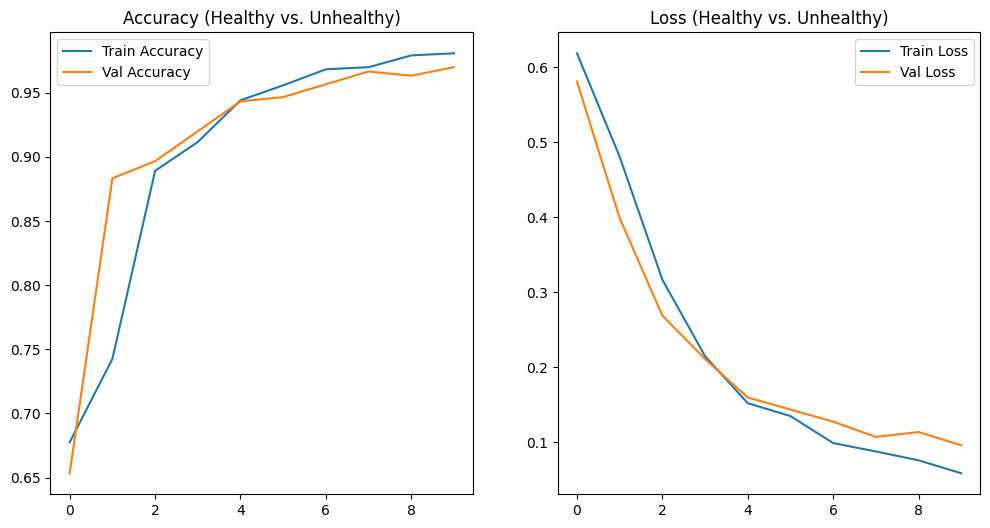

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step
Accuracy (Healthy vs. Unhealthy): 0.97


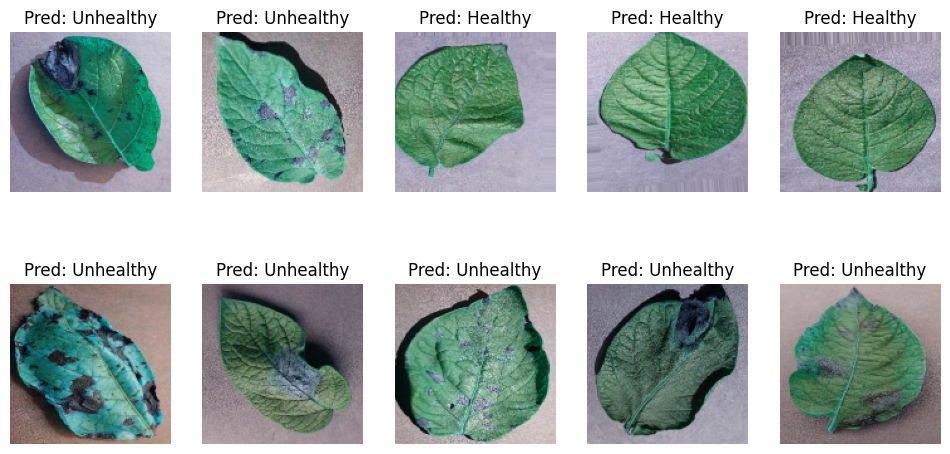

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6546 - loss: 0.6577 - val_accuracy: 0.7233 - val_loss: 0.5502
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7450 - loss: 0.5396 - val_accuracy: 0.9167 - val_loss: 0.3969
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8776 - loss: 0.3298 - val_accuracy: 0.9400 - val_loss: 0.1816
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9401 - loss: 0.1913 - val_accuracy: 0.9433 - val_loss: 0.1679
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 985ms/step - accuracy: 0.9435 - loss: 0.1535 - val_accuracy: 0.9500 - val_loss: 0.1212
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 974ms/step - accuracy: 0.9755 - loss: 0.0917 - val_accuracy: 0.9667 - val_loss: 0.0989
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9679 - loss: 0.0962 - val_accuracy: 0.9667 - val_loss: 0.0916
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9629 - loss: 0.0945 - val_accuracy: 0.9667 - val

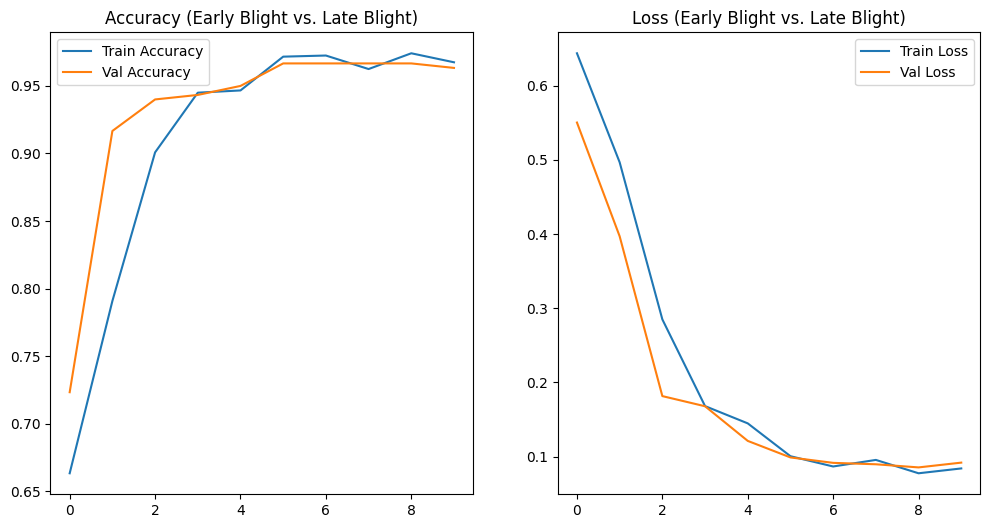

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 233ms/step
Accuracy (Early Blight vs. Late Blight): 0.9633333333333334


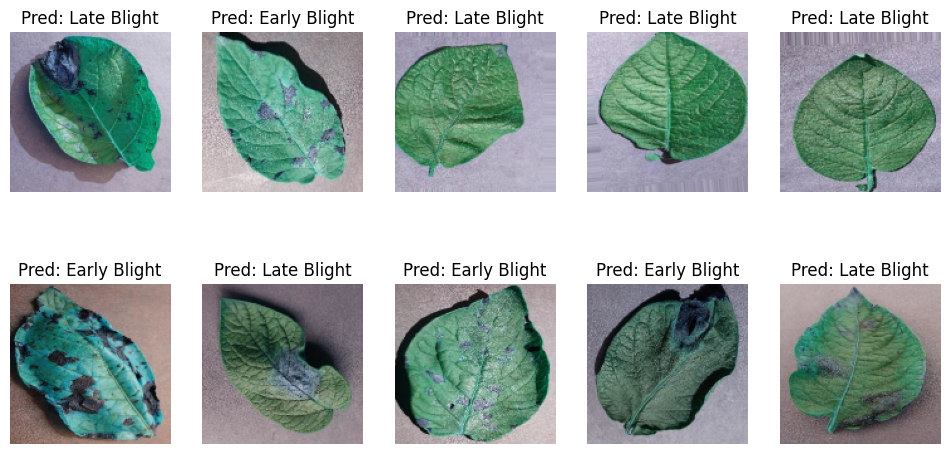

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Label encoding for Healthy vs. Unhealthy classification
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy

# Label encoding for Early Blight vs. Late Blight classification
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model for Healthy vs. Unhealthy classification
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create Adam optimizer
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.0001)

# Compile and train the model
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
history_healthy_unhealthy = model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_healthy_unhealthy.history['accuracy'], label='Train Accuracy')
plt.plot(history_healthy_unhealthy.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy (Healthy vs. Unhealthy)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_healthy_unhealthy.history['loss'], label='Train Loss')
plt.plot(history_healthy_unhealthy.history['val_loss'], label='Val Loss')
plt.title('Loss (Healthy vs. Unhealthy)')
plt.legend()

plt.show()

# Evaluate model on test data
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Display some predictions with images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Pred: {'Healthy' if y_pred_healthy_unhealthy[i] == 0 else 'Unhealthy'}")
    axes[i].axis('off')
plt.show()

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Model for Early Blight vs. Late Blight classification
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create Adam optimizer for Early Blight vs. Late Blight model
adam_optimizer_early_late = Adam(learning_rate=0.0001)

# Compile and train the model
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
history_early_late = model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_early_late.history['accuracy'], label='Train Accuracy')
plt.plot(history_early_late.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy (Early Blight vs. Late Blight)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_early_late.history['loss'], label='Train Loss')
plt.plot(history_early_late.history['val_loss'], label='Val Loss')
plt.title('Loss (Early Blight vs. Late Blight)')
plt.legend()

plt.show()

# Evaluate model on test data
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))

# Display some predictions with images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_test_early_late[i])
    axes[i].set_title(f"Pred: {'Early Blight' if y_pred_early_late[i] == 0 else 'Late Blight'}")
    axes[i].axis('off')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 995ms/step - accuracy: 0.6404 - loss: 0.6371 - val_accuracy: 0.6533 - val_loss: 0.5927
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6963 - loss: 0.5454 - val_accuracy: 0.8433 - val_loss: 0.4477
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8296 - loss: 0.4008 - val_accuracy: 0.8333 - val_loss: 0.3431
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8810 - loss: 0.2803 - val_accuracy: 0.9167 - val_loss: 0.2404
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 985ms/step - accuracy: 0.9275 - loss: 0.1906 - val_accuracy: 0.9400 - val_loss: 0.1704
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 983ms/step - accuracy: 0.9634 - loss: 0.1299 - val_accuracy: 0.9500 - val_loss: 0.1445
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 985ms/step - accuracy: 0.9662 - loss: 0.1052 - val_accuracy: 0.9500 - val_loss: 0.1326
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 990ms/step - accuracy: 0.9703 - loss: 0.1042 - val_accuracy: 0.9

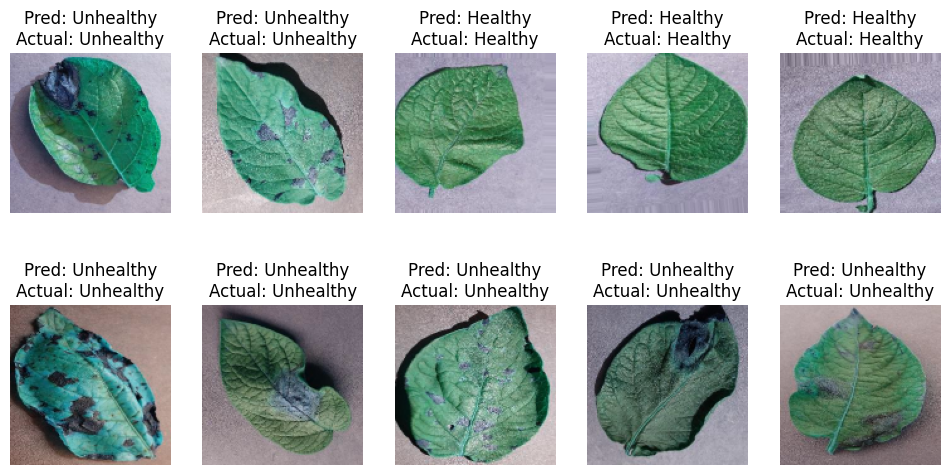

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6696 - loss: 0.6492 - val_accuracy: 0.8133 - val_loss: 0.5852
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8041 - loss: 0.4944 - val_accuracy: 0.9167 - val_loss: 0.2903
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 979ms/step - accuracy: 0.9177 - loss: 0.2702 - val_accuracy: 0.9500 - val_loss: 0.1479
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 38s 997ms/step - accuracy: 0.9474 - loss: 0.1540 - val_accuracy: 0.9633 - val_loss: 0.1097
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.9640 - loss: 0.0877 - val_accuracy: 0.9667 - val_loss: 0.1020
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 37s 966ms/step - accuracy: 0.9765 - loss: 0.0684 - val_accuracy: 0.9667 - val_loss: 0.0941
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 42s 993ms/step - accuracy: 0.9728 - loss: 0.0774 - val_accuracy: 0.9633 - val_loss: 0.1093
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 983ms/step - accuracy: 0.9701 - loss: 0.0846 - val_accuracy: 0.9

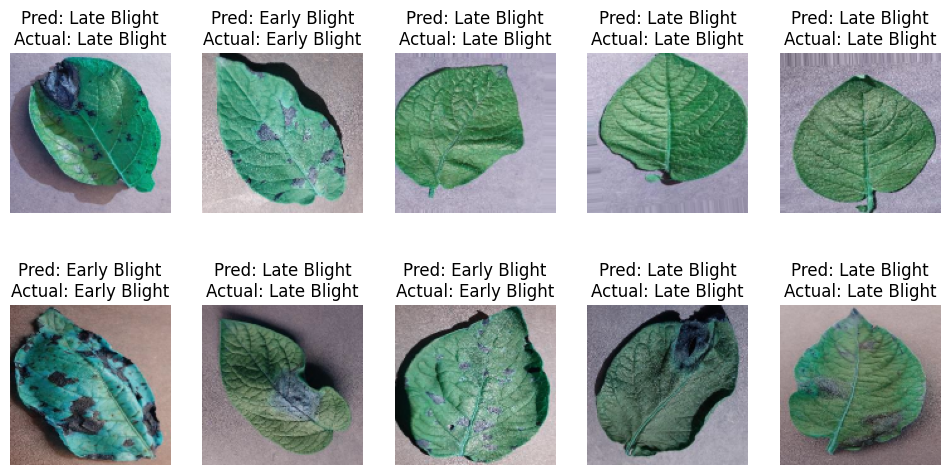

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Directory of dataset
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato'

# Load images and labels
def load_data(data_dir):
    images, labels = [], []

    # Loop through directories: Train, Test, Valid
    for label_folder in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, label_folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            for subfolder in os.listdir(folder_path):  # Loop through subfolders (e.g., Potato___Early_blight)
                subfolder_path = os.path.join(folder_path, subfolder)
                if os.path.isdir(subfolder_path):  # Check if it's a directory
                    for filename in os.listdir(subfolder_path):  # Loop through files in subfolder
                        img_path = os.path.join(subfolder_path, filename)
                        # Only process image files
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            img = cv2.imread(img_path)
                            if img is not None:  # Check if image was loaded successfully
                                img = cv2.resize(img, (128, 128))  # Resize image
                                images.append(img)
                                labels.append(subfolder)

    return np.array(images), np.array(labels)

# Load data
images, labels = load_data(data_dir)

# Label encoding for Healthy vs. Unhealthy classification
labels_healthy_unhealthy = np.where(labels == 'Potato___healthy', 0, 1)  # 0: Healthy, 1: Unhealthy

# Label encoding for Early Blight vs. Late Blight classification
labels_early_late = np.where(labels == 'Potato___Early_blight', 0, 1)  # 0: Early Blight, 1: Late Blight

# Split into train and test sets for Healthy vs. Unhealthy classification
X_train, X_test, y_train, y_test = train_test_split(images, labels_healthy_unhealthy, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Model for Healthy vs. Unhealthy classification
model_healthy_unhealthy = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Healthy vs. Unhealthy)
])

# Create Adam optimizer
adam_optimizer_healthy_unhealthy = Adam(learning_rate=0.0001)

# Compile and train the model
model_healthy_unhealthy.compile(optimizer=adam_optimizer_healthy_unhealthy, loss='binary_crossentropy', metrics=['accuracy'])
history_healthy_unhealthy = model_healthy_unhealthy.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on test data
y_pred_healthy_unhealthy = (model_healthy_unhealthy.predict(X_test) > 0.5).astype("int32").flatten()
print("Accuracy (Healthy vs. Unhealthy):", accuracy_score(y_test, y_pred_healthy_unhealthy))

# Display some predictions with images, showing both predicted and actual labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_test[i])
    actual_label = 'Healthy' if y_test[i] == 0 else 'Unhealthy'
    predicted_label = 'Healthy' if y_pred_healthy_unhealthy[i] == 0 else 'Unhealthy'
    axes[i].set_title(f"Pred: {predicted_label}\nActual: {actual_label}")
    axes[i].axis('off')
plt.show()

# Now split the data for Early Blight vs. Late Blight classification
X_train_early_late, X_test_early_late, y_train_early_late, y_test_early_late = train_test_split(images, labels_early_late, test_size=0.2, random_state=42)

# Normalize images
X_train_early_late = X_train_early_late / 255.0
X_test_early_late = X_test_early_late / 255.0

# Model for Early Blight vs. Late Blight classification
model_early_late = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification (Early Blight vs. Late Blight)
])

# Create Adam optimizer for Early Blight vs. Late Blight model
adam_optimizer_early_late = Adam(learning_rate=0.0001)

# Compile and train the model
model_early_late.compile(optimizer=adam_optimizer_early_late, loss='binary_crossentropy', metrics=['accuracy'])
history_early_late = model_early_late.fit(X_train_early_late, y_train_early_late, epochs=10, validation_data=(X_test_early_late, y_test_early_late))

# Evaluate model on test data
y_pred_early_late = (model_early_late.predict(X_test_early_late) > 0.5).astype("int32").flatten()
print("Accuracy (Early Blight vs. Late Blight):", accuracy_score(y_test_early_late, y_pred_early_late))

# Display some predictions with images, showing both predicted and actual labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(X_test_early_late[i])
    actual_label = 'Early Blight' if y_test_early_late[i] == 0 else 'Late Blight'
    predicted_label = 'Early Blight' if y_pred_early_late[i] == 0 else 'Late Blight'
    axes[i].set_title(f"Pred: {predicted_label}\nActual: {actual_label}")
    axes[i].axis('off')
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
